# Analyse du comportement des clients d'un opérateur télécom

Le fichier `telecom_client.csv` contient de nombreuses informations sur les clients d'un opérateur télécom. Voyons si nous pouvons analyser ce fichier pour aider l'entreprise à augmenter ses profits.

## Premiers pas avec l'ensemble de données

In [120]:
# En utilisant la bibliothèque pandas, lisez le fichier telecom_client.csv

import matplotlib.pyplot as plt
import pandas as pd

filename = "telecom_client.csv"
data_clients = pd.read_csv(filename)
data_clients.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Termination  
0                       1        False  
1                       1        False  
2                       0        False  
3                       2        False  
4                       3        False

In [121]:
# Combien d'informations (c'est-à-dire de colonnes) y a-t-il dans cet ensemble de données ?
# Ne les comptez pas manuellement ! Utilisez un morceau de code pour le faire.
print("{} contains {} columns.".format(filename, data_clients.columns.size))

telecom_client.csv contains 20 columns.


In [122]:
# Combien de clients cet ensemble de données contient-il ?
print("{} contains {} clients.".format(filename, len(data_clients.index)))

telecom_client.csv contains 3333 clients.


In [123]:
# Imprimez les 15 premiers éléments de cet ensemble de données
data_clients.head(15)

State  Account length  Area code International plan Voice mail plan  \
0     KS             128        415                 No             Yes   
1     OH             107        415                 No             Yes   
2     NJ             137        415                 No              No   
3     OH              84        408                Yes              No   
4     OK              75        415                Yes              No   
5     AL             118        510                Yes              No   
6     MA             121        510                 No             Yes   
7     MO             147        415                Yes              No   
8     LA             117        408                 No              No   
9     WV             141        415                Yes             Yes   
10    IN              65        415                 No              No   
11    RI              74        415                 No              No   
12    IA             168        408                 No              No   
13    MT              95        510                 No              No   
14    IA              62        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
0                      25              265.1              110   
1                      26              161.6              123   
2                       0              243.4              114   
3                       0              299.4               71   
4                       0              166.7              113   
5                       0              223.4               98   
6                      24              218.2               88   
7                       0              157.0               79   
8                       0              184.5               97   
9                      37              258.6               84   
10                      0              129.1              137   
11                      0              187.7              127   
12                      0              128.8               96   
13                      0              156.6               88   
14                      0              120.7               70   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0              45.07              197.4               99             16.78   
1              27.47              195.5              103             16.62   
2              41.38              121.2              110             10.30   
3              50.90               61.9               88              5.26   
4              28.34              148.3              122             12.61   
5              37.98              220.6              101             18.75   
6              37.09              348.5              108             29.62   
7              26.69              103.1               94              8.76   
8              31.37              351.6               80             29.89   
9              43.96              222.0              111             18.87   
10             21.95              228.5               83             19.42   
11             31.91              163.4              148             13.89   
12             21.90              104.9               71              8.92   
13             26.62              247.6               75             21.05   
14             20.52              307.2               76             26.11   

    Total night minutes  Total night calls  Total night charge  \
0                 244.7                 91               11.01   
1                 254.4                103               11.45   
2                 162.6                104                7.32   
3                 196.9                 89                8.86   
4                 186.9                121                8.41   
5                 203.9                118                9.18   
6                 212.6                118                9.57   


In [124]:
# Quel est le type de données dans « Total des minutes de la journée »
# colonne?
print("The data type of {} is: {}.".format('"Total day minutes"', data_clients["Total day minutes"].dtype))

The data type of "Total day minutes" is: float64.


In [125]:
# Imprimer la liste des noms de colonnes
data_clients.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Termination'],
      dtype='object')

In [126]:
# Quels sont les 10 états les plus fréquents ?
state_frequency = data_clients.State.value_counts()
state_frequency.head(10)

State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64

In [127]:
# Quelle est la « durée moyenne du compte » pour l'Ohio (OH) ?
# pour le New Jersey (NJ) ?
average_ohio = data_clients[data_clients.State == "OH"]["Account length"].mean()
print(average_ohio)
average_newjersey = data_clients[data_clients.State == "NJ"]["Account length"].mean()
print(average_newjersey)

print("Average Account Length in Ohio (OH): {:.2f}".format(average_ohio))
print("Average Account Length in New Jersey (NJ): {:.2f}".format(average_newjersey))

102.15384615384616
100.20588235294117
Average Account Length in Ohio (OH): 102.15
Average Account Length in New Jersey (NJ): 100.21


In [128]:
# Quel est le nombre maximum d'« appels de nuit » ?
data_clients["Total night calls"].max()

175

In [129]:
# Quel est l'état avec le maximum de « nombre total d'appels de nuit » ?

# Tout d'abord, calculez le « nombre total d'appels de nuit » par état, c'est-à-dire regroupez
# par état et additionnez le « Total des appels de nuit » pour chaque client.
night_calls_per_state = data_clients.groupby("State").sum()["Total night calls"]

# puis obtenir l'état avec la valeur la plus élevée
night_calls_per_state.idxmax()

'WV'

## Trouver un problème

In [130]:
# L'ensemble de données contient une colonne « Terminaison » qui
# indique si le client a résilié son contrat avec
# l'opérateur. Trouvez le nombre de personnes qui ont résilié
# leur contrat.
count_termination = data_clients.Termination.value_counts()
print("{} people have terminated their contract.".format(count_termination[True]))

483 people have terminated their contract.


<Axes: title={'center': 'Number of users with contract terminated'}, xlabel='Termination'>

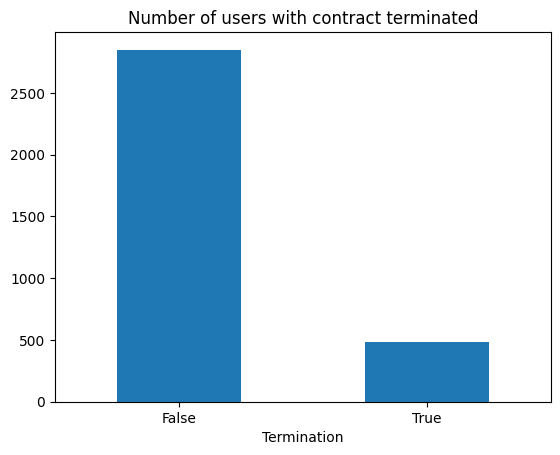

In [131]:
# Représente le nombre de personnes qui ont mis fin à leur
# contrat et ceux qui ne l'ont pas fait avec un graphique à barres verticales.
count_termination.plot(kind="bar", rot=0, title="Number of users with contract terminated")

In [132]:
# Trouvez le ratio de personnes qui ont résilié leur contrat
# parmi tous les utilisateurs.
ratio_termination = count_termination[True] / count_termination.sum()
print("The ratio of users who terminated their contract is: {:.2f}%".format(ratio_termination * 100))

The ratio of users who terminated their contract is: 14.49%


In [133]:
# Quelle est votre opinion sur ce ratio ?

Ce ratio est **VRAIMENT** élevé. Selon certains investisseurs en capital-risque, un taux de résiliation acceptable se situe entre 5 et 7 %.

## Identifier des modèles similaires

Pour augmenter ses profits, l'entreprise doit fidéliser ses clients et les empêcher de résilier leur contrat. Il peut y avoir une raison courante pour laquelle les clients résilient leur contrat.

In [134]:
# Trouver la moyenne de tous les champs pour les utilisateurs qui ont terminé
# leurs contrats.

mean_terminated = data_clients[data_clients["Termination"] == True]
mean_terminated.describe().loc["mean"]

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Name: mean, dtype: float64

In [135]:
# Trouvez la moyenne de tous les champs pour les utilisateurs qui ne l'ont pas fait
# ont résilié leurs contrats. Comparez-le à la moyenne de
# la question précédente. Voyez-vous de grandes différences ?
mean_not_terminated = data_clients[data_clients.Termination == False]
mean_not_terminated.describe().loc["mean"]

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Name: mean, dtype: float64

En général, les personnes qui ont résilié leur contrat :
* avoir moins de messages vmail (-40%)
* ont payé plus de frais (+11,8%)
* ont appelé davantage de services clients (+53%)

In [136]:
# Retrouvez les informations suivantes :
# - nombre d'utilisateurs avec un contrat ET (PAS de forfait international ET PAS de forfait de messagerie vocale)
# - nombre d'utilisateurs avec un contrat ET (Forfait international OU Forfait messagerie vocale)
# - nombre d'utilisateurs avec un contrat ET (Forfait International ET Forfait Messagerie vocale)
# - les mêmes 3 informations pour les utilisateurs ayant résilié leur contrat
contract_noINT_noVM = len(data_clients[(data_clients.Termination == False) &
                                       (data_clients["International plan"] == "No") &
                                       (data_clients["Voice mail plan"] == "No")].index)
contract_INT_or_VM = len(data_clients[(data_clients.Termination == False) &
                                       ((data_clients["International plan"] == "Yes") |
                                       (data_clients["Voice mail plan"] == "Yes"))].index)
contract_INT_and_VM = len(data_clients[(data_clients.Termination == False) &
                                       (data_clients["International plan"] == "Yes") &
                                       (data_clients["Voice mail plan"] == "Yes")].index)

no_contract_noINT_noVM = len(data_clients[(data_clients.Termination) &
                                       (data_clients["International plan"] == "No") &
                                       (data_clients["Voice mail plan"] == "No")].index)
no_contract_INT_or_VM = len(data_clients[(data_clients.Termination) &
                                       ((data_clients["International plan"] == "Yes") |
                                       (data_clients["Voice mail plan"] == "Yes"))].index)
no_contract_INT_and_VM = len(data_clients[(data_clients.Termination) &
                                       (data_clients["International plan"] == "Yes") &
                                       (data_clients["Voice mail plan"] == "Yes")].index)

# Contrôle de sécurité : addition du nombre de personnes avec (noINT & noVM) et (INT ou VM)
# pour les personnes avec et sans contrat, il faut donner le nombre total de clients.
# (car chaque client ne peut appartenir qu'à une seule de ces catégories)
s = contract_noINT_noVM + contract_INT_or_VM + no_contract_noINT_noVM + no_contract_INT_or_VM
print("Security check passed? {}".format(s == len(data_clients.index)))

Security check passed? True


<Axes: >

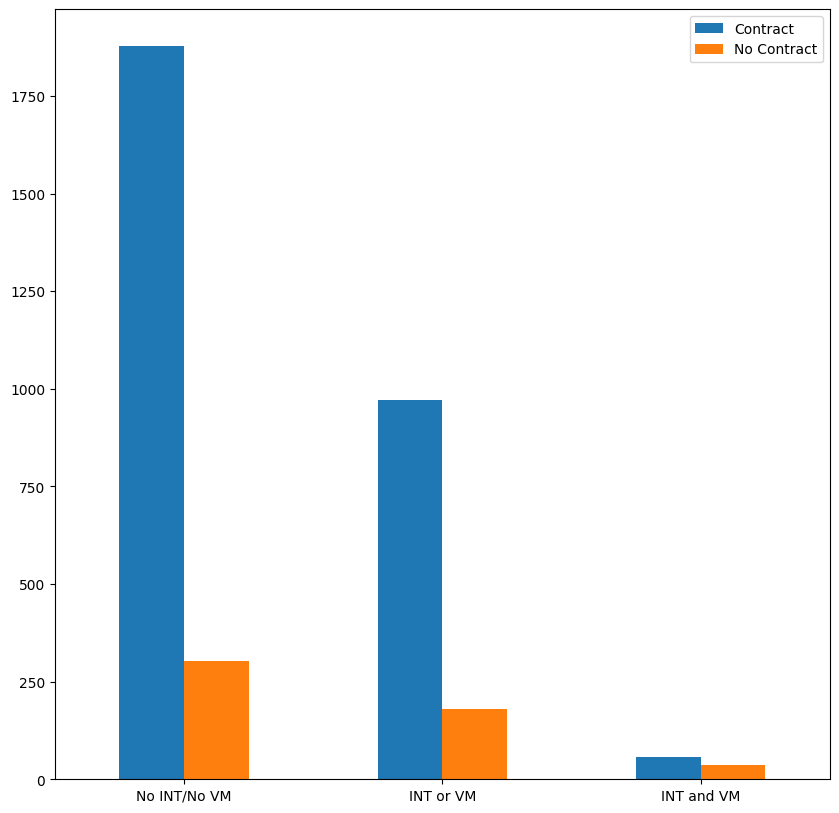

In [137]:
# Imprimez les 6 informations précédentes dans un graphique à barres verticales
# Ajouter une légende pour différencier les différentes catégories

# La visualisation la plus significative est celle qui trace la suite
# chaque catégorie avec des barres séparées pour terminé/non terminé.
infos = pd.DataFrame({"No INT/No VM": [contract_noINT_noVM, no_contract_noINT_noVM],
                      "INT or VM": [contract_INT_or_VM, no_contract_INT_or_VM],
                      "INT and VM": [contract_INT_and_VM, no_contract_INT_and_VM]
                     }, index=["Contract", "No Contract"])
infos.T.plot(kind="bar", rot=0, figsize=(10, 10))

En regardant le graphique, on peut voir que le taux de terminaison est plus élevé parmi les clients qui ont à la fois un forfait international et un forfait de messagerie vocale.

In [138]:
# Ajouter une nouvelle colonne « Frais totaux » qui correspond à la somme de 4
# autres colonnes:
# - "Frais journaliers totaux"
# - "Charge totale de la veille"
# - "Frais de nuit totale"
# - "Frais internationaux totaux"
data_clients["Total charge"] = data_clients["Total day charge"] + \
                               data_clients["Total eve charge"] + \
                               data_clients["Total night charge"] + \
                               data_clients["Total intl charge"]

In [139]:
# Trouvez la moyenne des « frais totaux » pour les utilisateurs ayant un contrat
# et ceux qui ont mis fin à leurs études. Avez-vous une opinion à ce sujet ?
# résultat?
mean_terminated_charge = data_clients[data_clients.Termination == True]["Total charge"].mean()
mean_not_terminated_charge = data_clients[data_clients.Termination == False]["Total charge"].mean()
print("Average charge for terminated users: {:.2f}".format(mean_terminated_charge))
print("Average charge for not terminated users: {:.2f}".format(mean_not_terminated_charge))
data_clients.groupby("Termination").mean('Total charge')
#data_clients.groupby("Termination").mean()["Total charge"]

Average charge for terminated users: 65.36
Average charge for not terminated users: 58.45


Account length   Area code  Number vmail messages  \
Termination                                                      
False            100.793684  437.074737               8.604561   
True             102.664596  437.817805               5.115942   

             Total day minutes  Total day calls  Total day charge  \
Termination                                                         
False               175.175754       100.283158         29.780421   
True                206.914079       101.335404         35.175921   

             Total eve minutes  Total eve calls  Total eve charge  \
Termination                                                         
False               199.043298       100.038596         16.918909   
True                212.410145       100.561077         18.054969   

             Total night minutes  Total night calls  Total night charge  \
Termination                                                               
False                 200.133193         100.058246            9.006074   
True                  205.231677         100.399586            9.235528   

             Total intl minutes  Total intl calls  Total intl charge  \
Termination                                                            
False                 10.158877          4.532982           2.743404   
True                  10.700000          4.163561           2.889545   

             Customer service calls  Total charge  
Termination                                        
False                      1.449825     58.448807  
True                       2.229814     65.355963

En moyenne, les personnes ayant résilié leur contrat ont payé plus de frais (+11,8%). C'est peut-être une raison pour laquelle ils ont quitté leur opérateur (coût caché supplémentaire). L'opérateur devrait vérifier si les informations sur les excédents de facturation sont bien inscrites sur les contrats de ses clients.

In [140]:
# Trouvez les personnes ayant au moins 4 appels au client
# service. Quel est le ratio d'utilisateurs qui ont résilié parmi
# ces utilisateurs ?
more_than_4calls = data_clients[data_clients["Customer service calls"] >= 4]
ratio_more_than_4calls = more_than_4calls.Termination.value_counts()[True] / len(more_than_4calls.index)
print("Ratio of terminated contracts when service_calls >= 4: {:.2f}%".format(ratio_more_than_4calls * 100))

Ratio of terminated contracts when service_calls >= 4: 51.69%


Ce chiffre est **élevé**. Plus de la moitié des utilisateurs qui ont appelé au moins 4 fois le service client ont résilié leur contrat. Cela peut signifier :
* le service client est inefficace
* ces clients avaient beaucoup de problèmes (donc beaucoup d'appels) et étaient fatigués d'avoir un service dysfonctionnel